# Problem Statement

Despite the availability of Malaysia House Rental listings on platforms like iBilik, propertyguru or mudah.my, prospective tenants often struggle to determine whether **rental prices are justified** based on various property attributes.

This project aims to **analyze factors influencing rental prices** to provide potential renters and/or investors with a clearer understanding of the housing market dynamics in this area, and to **predict the expected rental pricing** for the property with given set of attributes.

# Data Collection

The data source for Regression Task is obtained from [Kaggle](https://www.kaggle.com/datasets/ariewijaya/rent-pricing-kuala-lumpur-malaysi/data), where the dataset itself is sourced from web scraping on the mudah.my website.

In [ ]:
!git clone https://github.com/LimJY03/MalaysiaRentalPrediction.git

Cloning into 'MalaysiaRentalPrediction'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 594.86 KiB | 3.18 MiB/s, done.
Resolving deltas: 100% (1/1), done.


# Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Constant for random state seed
RANDOM_STATE_SEED = 1

%matplotlib inline

df = pd.read_csv('./MalaysiaRentalPrediction/mudah-apartment-kl-selangor.csv')
df

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,100493687,Pangsapuri Gapura Bayu,NaN,RM 1 200 per month,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000 sq.ft.,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor
19987,100371347,BSP 21,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor
19988,100493228,Ameera Residence,NaN,RM 1 350 per month,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19989,100235153,The Arc @ Cyberjaya,NaN,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor


We will start by looking at the datatypes of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.1+

There are some columns that are supposed to be float instead of string. How about the possibility of outliers

In [ ]:
df.describe()

,ads_id,completion_year,parking,bathroom
count,1.999100e+04,10806.000000,14289.000000,19985.000000
mean,9.970671e+07,2014.822321,1.416824,1.891719
std,3.482575e+06,6.735355,0.567368,0.556266
min,1.652551e+07,1977.000000,1.000000,1.000000
25%,9.984012e+07,2012.000000,1.000000,2.000000
50%,1.002127e+08,2017.000000,1.000000,2.000000
75%,1.006179e+08,2020.000000,2.000000,2.000000
max,1.008546e+08,2025.000000,10.000000,8.000000


 It's interesting to have rental unit not completed but listed on the website, i.e. the one with `completion_year` after 2024. Next, let's look at the null values

In [ ]:
df.isnull().sum()

,0
ads_id,0
prop_name,948
completion_year,9185
monthly_rent,2
location,0
property_type,0
rooms,6
parking,5702
bathroom,6
size,0


From the above info, we can list out the task we need to do:

1. Columns `monthly_rent`, `size` to be converted to type `int`
2. Drop `ads_id` and `prop_name` since they don't help in price prediction
3. Dealing with null values:
    * `completion_year` to use median / mean imputation
    * drop rows where `monthly_rent` is null
    * `rooms` to explore, minimum 1 else it shouldn't be listed
    * `parking` to fill null with 0
    * `bathroom` and `furnished` to be explored
    * `facilities` and `additional_facilities` both be dropped since there are too many null values
4. Dealing with outliers
    * Remove rows where `completion_year` is 2025
    * Remove further outliers


## Drop columns and rows

In [ ]:
df = df.drop(['ads_id', 'prop_name', 'facilities', 'additional_facilities'], axis=1)
df = df.dropna(subset=['monthly_rent'], axis=0)
df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,Kuala Lumpur
1,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,Kuala Lumpur
2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,Kuala Lumpur
3,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,Kuala Lumpur
4,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19986,NaN,RM 1 200 per month,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000 sq.ft.,Partially Furnished,Selangor
19987,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished,Selangor
19988,NaN,RM 1 350 per month,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished,Selangor
19989,NaN,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished,Selangor


## Datatype Conversion

In [ ]:
df['monthly_rent'] = df['monthly_rent'].str.replace(' ', '').str.extract(r'(\d+\s*\d*)').astype(int)
df['size'] = df['size'].str.replace(' ', '').str.extract(r'(\d+\s*\d*)').astype(int)
df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022.0,4200,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,Kuala Lumpur
1,NaN,2300,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,Kuala Lumpur
2,NaN,1000,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650,Fully Furnished,Kuala Lumpur
3,2020.0,1700,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,Kuala Lumpur
4,NaN,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494,Not Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19986,NaN,1200,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000,Partially Furnished,Selangor
19987,2018.0,1300,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,Selangor
19988,NaN,1350,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,Selangor
19989,NaN,1200,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,Selangor


## Null Imputation

### `completion_year` to use median / mean imputation

We will decide based on the distribution of the values in the column

<Axes: xlabel='completion_year', ylabel='Count'>

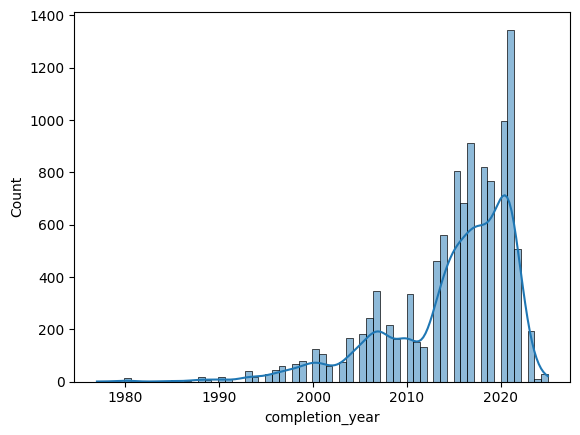

In [ ]:
sns.histplot(df['completion_year'], kde=True)

Since the graph is skewed, we will use median imputation

In [ ]:
df['completion_year'] = df['completion_year'].fillna(df['completion_year'].median()).astype(int)
df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,Kuala Lumpur
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,Kuala Lumpur
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650,Fully Furnished,Kuala Lumpur
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,Kuala Lumpur
4,2017,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494,Not Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19986,2017,1200,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000,Partially Furnished,Selangor
19987,2018,1300,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,Selangor
19988,2017,1350,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,Selangor
19989,2017,1200,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,Selangor


### `rooms` to explore, minimum 1 else it shouldn't be listed

We look at the rows where `rooms` is null first

In [ ]:
df[df['rooms'].isnull()]

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
3668,2017,150,Kuala Lumpur - Sentul,Condo / Services residence / Penthouse / Townh...,NaN,NaN,NaN,100,Not Furnished,Kuala Lumpur
8112,2017,100,Kuala Lumpur - Mid Valley City,Residential,NaN,NaN,NaN,100,NaN,Kuala Lumpur
12875,2017,650,Selangor - 43,Houses,NaN,1.0,NaN,300,Fully Furnished,Selangor
15765,2017,85,Selangor - Seri Kembangan,Soho,NaN,1.0,NaN,761,NaN,Selangor
16812,2017,600,Selangor - Kajang,Others,NaN,NaN,NaN,750,NaN,Selangor
16991,2017,150,Selangor - Sungai Buloh,Others,NaN,NaN,NaN,25,Not Furnished,Selangor


As a Malaysian, since the rental is quite low thus we can assume that `rooms` is 1.

Also, since these rows are the ones where `bathroom` is also null, thus we assume that this 1 room will have 0 bathroom.

In [ ]:
df.loc[df['rooms'].isnull(), ['rooms', 'bathroom']] = [1, 0]
df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,Kuala Lumpur
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,Kuala Lumpur
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650,Fully Furnished,Kuala Lumpur
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,Kuala Lumpur
4,2017,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494,Not Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19986,2017,1200,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000,Partially Furnished,Selangor
19987,2018,1300,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,Selangor
19988,2017,1350,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,Selangor
19989,2017,1200,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,Selangor


### `parking` to fill null with 0

In [ ]:
df.loc[df['parking'].isnull(), 'parking'] = 0
df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,Kuala Lumpur
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,Kuala Lumpur
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,0.0,2.0,650,Fully Furnished,Kuala Lumpur
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,Kuala Lumpur
4,2017,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494,Not Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19986,2017,1200,Selangor - Kajang,Apartment,3.0,0.0,2.0,1000,Partially Furnished,Selangor
19987,2018,1300,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,Selangor
19988,2017,1350,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,Selangor
19989,2017,1200,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,Selangor


Let's check if we can safely convert the above null-imputed columns to integer

In [ ]:
for col in ['rooms', 'parking', 'bathroom']:
    print(df[col].value_counts())

rooms
3.0             6459
3               6320
2               1805
1.0             1527
2.0             1489
4                915
1                867
4.0              473
5                 54
5.0               38
6                 19
7                  6
1                  6
6.0                4
More than 10       2
7.0                2
9                  1
9.0                1
10.0               1
Name: count, dtype: int64
parking
1.0     8644
0.0     5701
2.0     5426
3.0      179
4.0       23
10.0       6
5.0        6
6.0        2
9.0        1
7.0        1
Name: count, dtype: int64
bathroom
2.0    14885
1.0     3800
3.0     1065
4.0      160
5.0       54
6.0        9
7.0        7
0.0        6
8.0        3
Name: count, dtype: int64


Only the `rooms` column has non-numeric values `'More than 10'` and only 2 occurrences, so we will just set them as 11

In [ ]:
df.loc[df['rooms'] == 'More than 10', 'rooms'] = 11
df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842,Fully Furnished,Kuala Lumpur
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170,Partially Furnished,Kuala Lumpur
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,0.0,2.0,650,Fully Furnished,Kuala Lumpur
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743,Partially Furnished,Kuala Lumpur
4,2017,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494,Not Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19986,2017,1200,Selangor - Kajang,Apartment,3.0,0.0,2.0,1000,Partially Furnished,Selangor
19987,2018,1300,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427,Partially Furnished,Selangor
19988,2017,1350,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270,Partially Furnished,Selangor
19989,2017,1200,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100,Fully Furnished,Selangor


Now we convert them into `int` type

In [ ]:
df['rooms'] = df['rooms'].astype(float).astype(int)
df['parking'] = df['parking'].astype(float).astype(int)
df['bathroom'] = df['bathroom'].astype(float).astype(int)
df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842,Fully Furnished,Kuala Lumpur
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1,2,1170,Partially Furnished,Kuala Lumpur
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,0,2,650,Fully Furnished,Kuala Lumpur
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743,Partially Furnished,Kuala Lumpur
4,2017,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1,1,494,Not Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19986,2017,1200,Selangor - Kajang,Apartment,3,0,2,1000,Partially Furnished,Selangor
19987,2018,1300,Selangor - Bandar Saujana Putra,Service Residence,4,2,3,1427,Partially Furnished,Selangor
19988,2017,1350,Selangor - Kajang,Condominium,3,2,2,1270,Partially Furnished,Selangor
19989,2017,1200,Selangor - Cyberjaya,Service Residence,3,1,2,1100,Fully Furnished,Selangor


### `furnished` to be explored

We will look at what our `furnished` column look like

In [ ]:
df['furnished'].value_counts()

,count
furnished,
Fully Furnished,8462
Partially Furnished,8004
Not Furnished,3520


Let's look at the rows where `furnished` is null

In [ ]:
df[df['furnished'].isnull()]

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
8112,2017,100,Kuala Lumpur - Mid Valley City,Residential,1,0,0,100,NaN,Kuala Lumpur
15765,2017,85,Selangor - Seri Kembangan,Soho,1,1,0,761,NaN,Selangor
16812,2017,600,Selangor - Kajang,Others,1,0,0,750,NaN,Selangor


We explore the typical `monthly_rent` for 1 room for each `furnished` type

In [ ]:
df[df['rooms'] == 1]['monthly_rent'].groupby(df['furnished']).mean()

,monthly_rent
furnished,
Fully Furnished,1628.430286
Not Furnished,868.050000
Partially Furnished,3423.601713


Okay this looks illogical for partial furnished to be significantly higher than fully furnished, outliers exist so let's use median

In [ ]:
df[df['rooms'] == 1]['monthly_rent'].groupby(df['furnished']).median()

,monthly_rent
furnished,
Fully Furnished,1400.0
Not Furnished,800.0
Partially Furnished,1200.0


Since all the rooms with `furnished` as null have rental below 800, we just set them to unfurnished

In [ ]:
df.loc[df['furnished'].isnull(), 'furnished'] = 'Not Furnished'
df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842,Fully Furnished,Kuala Lumpur
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1,2,1170,Partially Furnished,Kuala Lumpur
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,0,2,650,Fully Furnished,Kuala Lumpur
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743,Partially Furnished,Kuala Lumpur
4,2017,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1,1,494,Not Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19986,2017,1200,Selangor - Kajang,Apartment,3,0,2,1000,Partially Furnished,Selangor
19987,2018,1300,Selangor - Bandar Saujana Putra,Service Residence,4,2,3,1427,Partially Furnished,Selangor
19988,2017,1350,Selangor - Kajang,Condominium,3,2,2,1270,Partially Furnished,Selangor
19989,2017,1200,Selangor - Cyberjaya,Service Residence,3,1,2,1100,Fully Furnished,Selangor


### Recheck Null Imputation

We check if all null values are handled

In [ ]:
df.isnull().sum()

,0
completion_year,0
monthly_rent,0
location,0
property_type,0
rooms,0
parking,0
bathroom,0
size,0
furnished,0
region,0


### Dealing with Outliers

We first remove the rows where the `completion_year` is after 2024.

In [ ]:
df = df[df['completion_year'] <= 2024]
df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
0,2022,4200,Kuala Lumpur - Taman Desa,Condominium,5,2,6,1842,Fully Furnished,Kuala Lumpur
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1,2,1170,Partially Furnished,Kuala Lumpur
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,0,2,650,Fully Furnished,Kuala Lumpur
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743,Partially Furnished,Kuala Lumpur
4,2017,1299,Kuala Lumpur - Mont Kiara,Service Residence,1,1,1,494,Not Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19986,2017,1200,Selangor - Kajang,Apartment,3,0,2,1000,Partially Furnished,Selangor
19987,2018,1300,Selangor - Bandar Saujana Putra,Service Residence,4,2,3,1427,Partially Furnished,Selangor
19988,2017,1350,Selangor - Kajang,Condominium,3,2,2,1270,Partially Furnished,Selangor
19989,2017,1200,Selangor - Cyberjaya,Service Residence,3,1,2,1100,Fully Furnished,Selangor


Look at the statistics of the data again

In [ ]:
df.describe()

,completion_year,monthly_rent,rooms,parking,bathroom,size
count,19960.000000,1.996000e+04,19960.000000,19960.000000,19960.000000,1.996000e+04
mean,2015.809419,2.269346e+03,2.680912,1.011874,1.890982,5.929957e+03
std,5.061202,2.242913e+04,0.812706,0.799324,0.557563,7.078086e+05
min,1977.000000,7.000000e+01,1.000000,0.000000,0.000000,1.000000e+00
25%,2016.000000,1.100000e+03,2.000000,0.000000,2.000000,7.500000e+02
50%,2017.000000,1.400000e+03,3.000000,1.000000,2.000000,8.850000e+02
75%,2017.000000,1.800000e+03,3.000000,2.000000,2.000000,1.044000e+03
max,2024.000000,2.400000e+06,11.000000,10.000000,8.000000,1.000000e+08


Using the statistics, we can remove the outliers for `monthly_rent`, `rooms`, `parking`, `bathroom` and `size`

In [ ]:
col_to_rm_outliers = ['monthly_rent', 'rooms', 'parking', 'bathroom', 'size']

def remove_outliers(df, col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in col_to_rm_outliers:
    df = remove_outliers(df, col)

df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
1,2017,2300,Kuala Lumpur - Cheras,Condominium,3,1,2,1170,Partially Furnished,Kuala Lumpur
2,2017,1000,Kuala Lumpur - Taman Desa,Apartment,3,0,2,650,Fully Furnished,Kuala Lumpur
3,2020,1700,Kuala Lumpur - Sentul,Apartment,2,1,2,743,Partially Furnished,Kuala Lumpur
5,2017,1500,Kuala Lumpur - Setapak,Apartment,3,1,2,884,Partially Furnished,Kuala Lumpur
9,2017,1350,Kuala Lumpur - Desa ParkCity,Condominium,3,1,2,862,Partially Furnished,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...
19982,2017,1100,Selangor - Puchong,Apartment,3,1,2,941,Partially Furnished,Selangor
19983,2021,885,Selangor - Cyberjaya,Condominium,3,2,2,1015,Partially Furnished,Selangor
19986,2017,1200,Selangor - Kajang,Apartment,3,0,2,1000,Partially Furnished,Selangor
19988,2017,1350,Selangor - Kajang,Condominium,3,2,2,1270,Partially Furnished,Selangor


Check the statistics again

In [ ]:
df.describe()

,completion_year,monthly_rent,rooms,parking,bathroom,size
count,13586.000000,13586.000000,13586.000000,13586.000000,13586.0,13586.000000
mean,2015.785441,1452.860445,2.892536,1.046887,2.0,925.408803
std,5.256957,488.279097,0.457474,0.762632,0.0,155.512837
min,1980.000000,120.000000,1.000000,0.000000,2.0,508.000000
25%,2017.000000,1100.000000,3.000000,0.000000,2.0,820.000000
50%,2017.000000,1400.000000,3.000000,1.000000,2.0,900.000000
75%,2017.000000,1700.000000,3.000000,2.000000,2.0,1015.000000
max,2024.000000,2850.000000,4.000000,5.000000,2.0,1341.000000


Looks more normal now

## EDA



Let's explore the `location` column

In [ ]:
df['location'].value_counts()

,count
location,
Kuala Lumpur - Cheras,1253
Kuala Lumpur - Setapak,783
Selangor - Kajang,706
Kuala Lumpur - Sentul,639
Selangor - Puchong,630
...,...
Selangor - Bandar Botanic,1
Selangor - 369,1
Selangor - Mutiara Damansara,1


See how many states we have

In [ ]:
df['location'].str.split(' - ').str[0].value_counts()

,count
location,
Selangor,6827
Kuala Lumpur,6759


Looks like we only have Selangor and Kuala Lumpur, which is the `region`, how about the cities

In [ ]:
df['location'].str.split(' - ').str[1].value_counts()

,count
location,
Cheras,1633
Setapak,783
Kajang,706
Puchong,659
Sentul,639
...,...
369,1
Serendah,1
Mutiara Damansara,1


Since we have 116 cities here, let's look at the top 15 cities with most number of rental units

<Axes: title={'center': 'Top 15 Cities with Most Rental Units'}, xlabel='count', ylabel='location'>

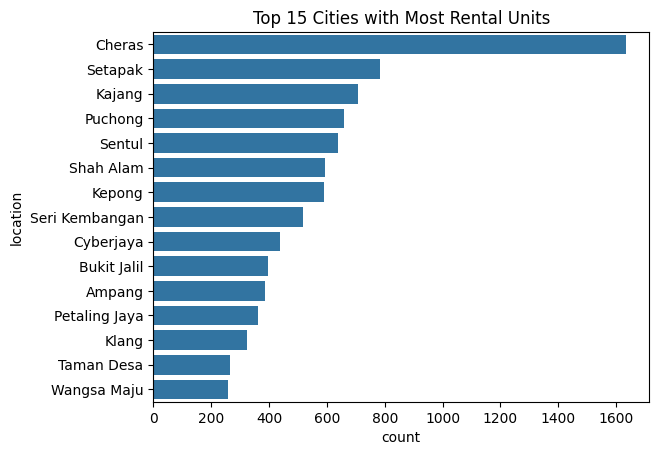

In [ ]:
df['location'] = df['location'].str.split(' - ').str[1]
top_cities = df['location'].value_counts().reset_index()[:15]

# Plot bar chart
plt.title('Top 15 Cities with Most Rental Units')
sns.barplot(data=top_cities, x='count', y='location')

Let's see how property types affect the rental price

<Axes: title={'center': 'Average Monthly Rent for each Property Type'}, xlabel='monthly_rent', ylabel='property_type'>

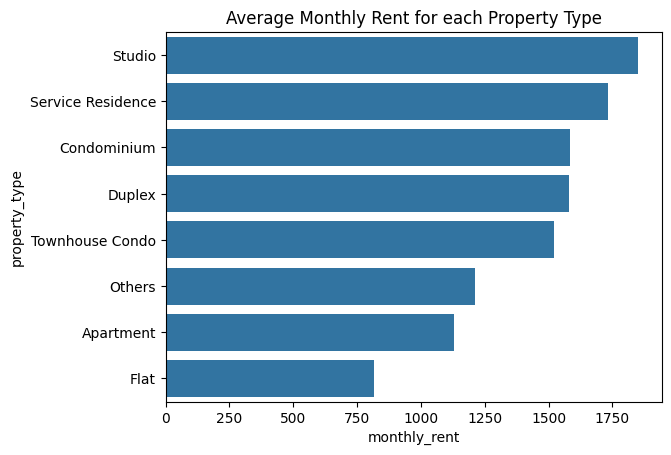

In [ ]:
type_price = df.groupby(['property_type'])['monthly_rent'].mean().sort_values(ascending=False).reset_index()

# Plot bar chart
plt.title('Average Monthly Rent for each Property Type')
sns.barplot(data=type_price, x='monthly_rent', y='property_type')

As expected, high rise buildings' units are more expensive.

Let's look at the room per price for each city

<Axes: title={'center': 'Top 15 Cities with Most Expensive Price per Room'}, xlabel='price_per_room', ylabel='location'>

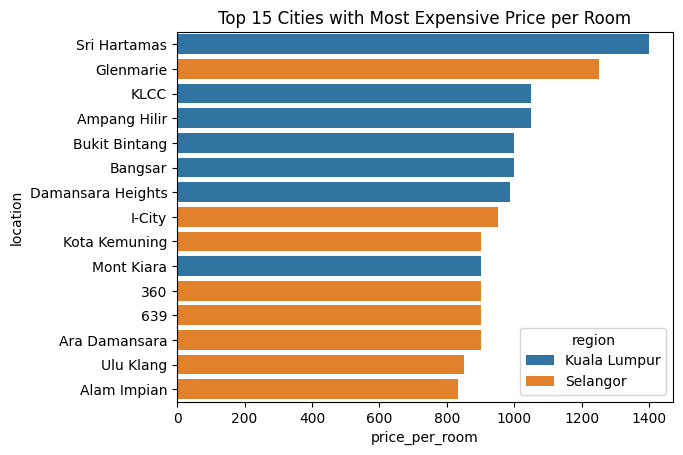

In [ ]:
df2 = df.copy()
df2['price_per_room'] = df2['monthly_rent'] / df2['rooms']

# Look at only the top 15 most expensive ones
expensive_cities = df2.groupby(['location', 'region'])[['price_per_room']].median().sort_values(by='price_per_room', ascending=False)[:15]

# Plot bar chart
plt.title('Top 15 Cities with Most Expensive Price per Room')
sns.barplot(data=expensive_cities, x='price_per_room', y='location', hue='region')

We can see that these cities consists of quite balance amount of representatives from KL and Selangor, but KL still has a slightly higher pricing than Selangor

Let's see if the completion date of the unit affects the current rental pricing

<Axes: title={'center': 'Price per Room against Completion Year'}, xlabel='completion_year', ylabel='price_per_room'>

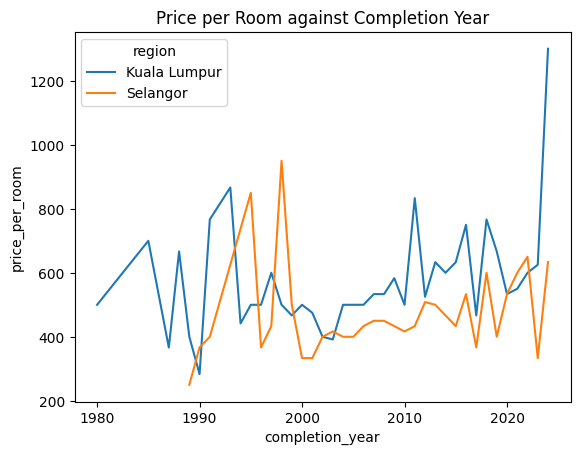

In [ ]:
pricing_trend = df2.groupby(['completion_year', 'region'])[['price_per_room']].median()

# Plot line graph
plt.title('Price per Room against Completion Year')
sns.lineplot(data=pricing_trend, x='completion_year', y='price_per_room', hue='region')

The completion date slightly affects the rental pricing, with Selangor's being more stable and KL's showing a visible increase in pricing, indicating newer properties in KL can be rented at higher price

Let's explore about the size of rental units

<Axes: title={'center': 'Top 15 Cities with Biggest Rental Units'}, xlabel='size', ylabel='location'>

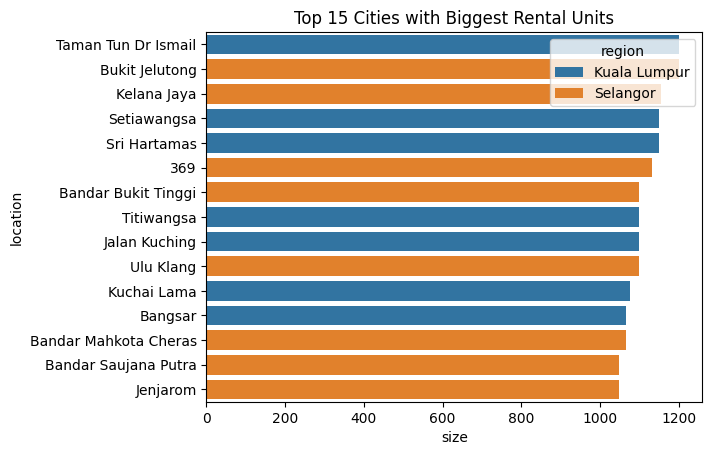

In [ ]:
# Look at only the top 15 most expensive ones
expensive_cities = df2.groupby(['location', 'region'])[['size']].median().sort_values(by='size', ascending=False)[:15]

# Plot bar chart
plt.title('Top 15 Cities with Biggest Rental Units')
sns.barplot(data=expensive_cities, x='size', y='location', hue='region')

It is quite average from the bar chart above, that neither of KL rental units nor Selangor rental units are bigger generally.

Let's also look at the furnished status for KL and Selangor

<Axes: xlabel='region'>

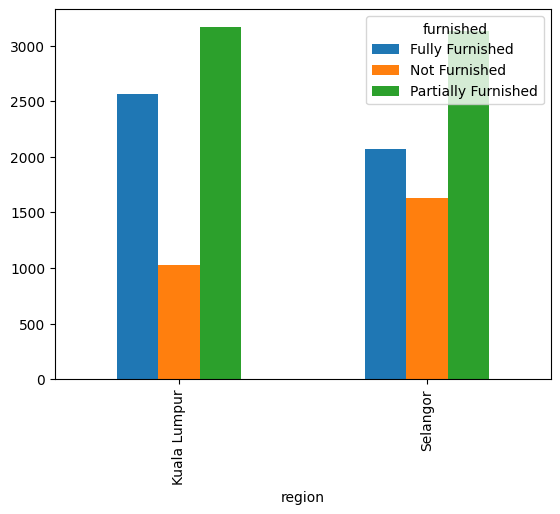

In [ ]:
df.groupby(['region', 'furnished']).size().unstack(fill_value=0).plot(kind='bar')

From the chart, there are usually less unfurnished rental units listed and more of the partially or fully furnished rental ones.

KL has more furnished rooms than Selangor, whereas Selangor has more unfurnished ones than KL

How about number of rooms?

<Axes: xlabel='region'>

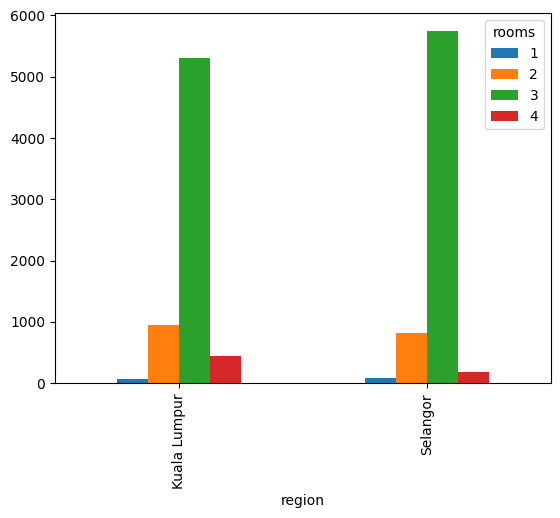

In [ ]:
df.groupby(['region', 'rooms']).size().unstack(fill_value=0).plot(kind='bar')

Looks like most Malaysian rental units are of type 3 bedrooms

Lastly, let's explore about the property type

<Axes: xlabel='region'>

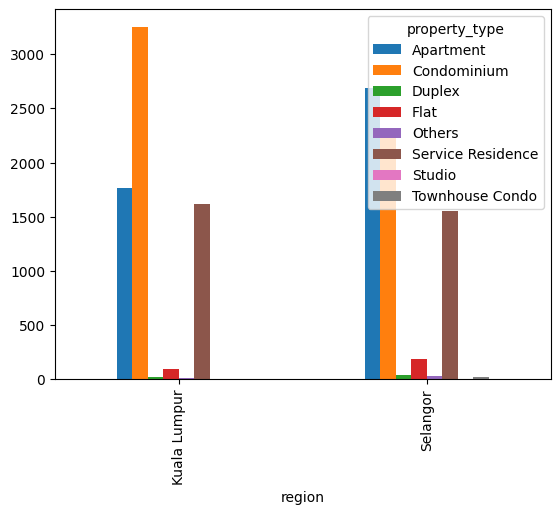

In [ ]:
df.groupby(['region', 'property_type']).size().unstack(fill_value=0).plot(kind='bar')

Seems like rental units are mostly consisted of condominium, service residence and apartments, with KL having the most number of condominium units to be rented.

# Regression

Start off by importing relevant libraries

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Model libraries
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

## Data Preparation

Since we have numerical and categorical columns in our dataset, we will need to perform encoding on the categorical ones

In [ ]:
# Create mapping from property type to average price sorted
type_price_map = type_price.drop('monthly_rent', axis=1).reset_index().set_index('property_type')['index']

# Use label encoding on property type column
df['property_type'] = df['property_type'].map(type_price_map)

# Use label encoding on furnished column
df.loc[df['furnished'] == 'Not Furnished','furnished'] = 0
df.loc[df['furnished'] == 'Partially Furnished','furnished'] = 1
df.loc[df['furnished'] == 'Fully Furnished','furnished'] = 2

# Use label encoding on region column
df.loc[df['region'] == 'Selangor', 'region'] = 0
df.loc[df['region'] == 'Kuala Lumpur', 'region'] = 1

df

,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,region
1,2017,2300,Cheras,2,3,1,2,1170,1,1
2,2017,1000,Taman Desa,6,3,0,2,650,2,1
3,2020,1700,Sentul,6,2,1,2,743,1,1
5,2017,1500,Setapak,6,3,1,2,884,1,1
9,2017,1350,Desa ParkCity,2,3,1,2,862,1,1
...,...,...,...,...,...,...,...,...,...,...
19982,2017,1100,Puchong,6,3,1,2,941,1,0
19983,2021,885,Cyberjaya,2,3,2,2,1015,1,0
19986,2017,1200,Kajang,6,3,0,2,1000,1,0
19988,2017,1350,Kajang,2,3,2,2,1270,1,0


Now, we are left with `location`, since there are 116 unique cities and it will be unwise to use one-hot encoding, and location is semi related to region so we will not use it forward in the model training later on.

In [ ]:
df = df.drop('location', axis=1)
df

,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,region
1,2017,2300,2,3,1,2,1170,1,1
2,2017,1000,6,3,0,2,650,2,1
3,2020,1700,6,2,1,2,743,1,1
5,2017,1500,6,3,1,2,884,1,1
9,2017,1350,2,3,1,2,862,1,1
...,...,...,...,...,...,...,...,...,...
19982,2017,1100,6,3,1,2,941,1,0
19983,2021,885,2,3,2,2,1015,1,0
19986,2017,1200,6,3,0,2,1000,1,0
19988,2017,1350,2,3,2,2,1270,1,0


Now that we are done with the categorical ones into numerical, we have to perform scaling on the numerical columns.

Since `completion_year` are between 1977 to 2024, we can create a new feature called `year_since_completion` which stores the number of years since the completion year to 2024, effectively making an impact for the column towards the pricing difference

In [ ]:
# "Scaling" completion_year
df['year_since_completion'] = 2024 - df['completion_year']
df = df.drop('completion_year', axis=1)
df

,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,region,year_since_completion
1,2300,2,3,1,2,1170,1,1,7
2,1000,6,3,0,2,650,2,1,7
3,1700,6,2,1,2,743,1,1,4
5,1500,6,3,1,2,884,1,1,7
9,1350,2,3,1,2,862,1,1,7
...,...,...,...,...,...,...,...,...,...
19982,1100,6,3,1,2,941,1,0,7
19983,885,2,3,2,2,1015,1,0,3
19986,1200,6,3,0,2,1000,1,0,7
19988,1350,2,3,2,2,1270,1,0,7


For the `size` column, we need to see the distribution to see if it can be scaled using standard scaler.

<Axes: xlabel='size', ylabel='Count'>

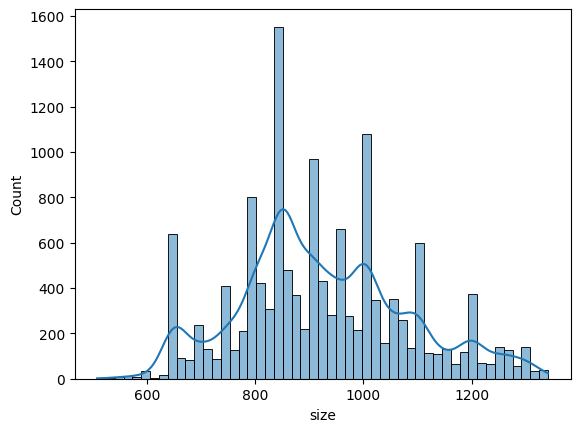

In [ ]:
# Check if size data are normally distributed to use standard scaler
sns.histplot(df['size'], kde=True)

Since it is normally distributed, we can use standard scaler to scale the feature values

In [ ]:
# Standard scaler
sscaler = StandardScaler()
df['size'] = sscaler.fit_transform(df[['size']])
df

,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,region,year_since_completion
1,2300,2,3,1,2,1.572862,1,1,7
2,1000,6,3,0,2,-1.771037,2,1,7
3,1700,6,2,1,2,-1.172993,1,1,4
5,1500,6,3,1,2,-0.266282,1,1,7
9,1350,2,3,1,2,-0.407755,1,1,7
...,...,...,...,...,...,...,...,...,...
19982,1100,6,3,1,2,0.100260,1,0,7
19983,885,2,3,2,2,0.576123,1,0,3
19986,1200,6,3,0,2,0.479664,1,0,7
19988,1350,2,3,2,2,2.215919,1,0,7


Check if all columns are numerical types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13586 entries, 1 to 19989
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthly_rent           13586 non-null  int64  
 1   property_type          13586 non-null  int64  
 2   rooms                  13586 non-null  int64  
 3   parking                13586 non-null  int64  
 4   bathroom               13586 non-null  int64  
 5   size                   13586 non-null  float64
 6   furnished              13586 non-null  object 
 7   region                 13586 non-null  object 
 8   year_since_completion  13586 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.5+ MB


In [ ]:
df['furnished'] = df['furnished'].astype(int)
df['region'] = df['region'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13586 entries, 1 to 19989
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthly_rent           13586 non-null  int64  
 1   property_type          13586 non-null  int64  
 2   rooms                  13586 non-null  int64  
 3   parking                13586 non-null  int64  
 4   bathroom               13586 non-null  int64  
 5   size                   13586 non-null  float64
 6   furnished              13586 non-null  int64  
 7   region                 13586 non-null  int64  
 8   year_since_completion  13586 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.5 MB


## Create feature and target

In [ ]:
X = df.drop('monthly_rent', axis=1)
y = df['monthly_rent']

# Split data to 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE_SEED)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (9510, 8)
X_test shape: (4076, 8)
y_train shape: (9510,)
y_test shape: (4076,)


## Model 1: Linear Model

Here we use Ridge Model instead of Linear Regression Model as there are tunable parameters for Ridge model.

In [ ]:
linear_model = Ridge()
linear_model.fit(X_train, y_train)

y_pred_lm = linear_model.predict(X_test)

print('RMSE:', lm_rmse := np.sqrt(mean_squared_error(y_test, y_pred_lm)))
print('MAE:', lm_mae := mean_absolute_error(y_test, y_pred_lm))

RMSE: 331.73108636791756
MAE: 252.43712608523472


### Tuning Ridge Model

In [ ]:
param_grid = {
    'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

tuned_linear_model = grid_search.best_estimator_
tuned_linear_model.fit(X_train, y_train)

y_pred_tuned_lm = tuned_linear_model.predict(X_test)

print(f'Best parameters: {grid_search.best_params_}')
print('RMSE:', tuned_lm_rmse := np.sqrt(mean_squared_error(y_test, y_pred_tuned_lm)))
print('MAE:', tuned_lm_mae := mean_absolute_error(y_test, y_pred_tuned_lm))

Best parameters: {'alpha': 10}
RMSE: 331.72640863634035
MAE: 252.4224451187362


## Model 2: Ensemble Model

Here we are using XGBoost Regressor model as our ensemble model to compare the prediction accuracy with the basic linear model

In [ ]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print('RMSE:', xgb_rmse := np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print('MAE:', xgb_mae := mean_absolute_error(y_test, y_pred_xgb))

RMSE: 264.15701210684244
MAE: 190.3484818418314


### Tuning XGBoost Regressor

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

tuned_xgb_model = grid_search.best_estimator_
tuned_xgb_model.fit(X_train, y_train)

y_pred_tuned_xgb = tuned_xgb_model.predict(X_test)

print(f'Best parameters: {grid_search.best_params_}')
print('RMSE:', tuned_xgb_rmse := np.sqrt(mean_squared_error(y_test, y_pred_tuned_xgb)))
print('MAE:', tuned_xgb_mae := mean_absolute_error(y_test, y_pred_tuned_xgb))

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
RMSE: 263.0258325257631
MAE: 187.3069755696455


# Model Results

Finally, we look at the model results

In [ ]:
pd.DataFrame({
    'Model': ['Ridge Model', 'Tuned Ridge Model', 'XGBoost Regressor', 'Tuned XGBoost Regressor'],
    'RMSE': [lm_rmse, tuned_lm_rmse, xgb_rmse, tuned_xgb_rmse],
    'MAE': [lm_mae, tuned_lm_mae, xgb_mae, tuned_xgb_mae]
})

,Model,RMSE,MAE
0,Ridge Model,331.731086,252.437126
1,Tuned Ridge Model,331.726409,252.422445
2,XGBoost Regressor,264.157012,190.348482
3,Tuned XGBoost Regressor,263.025833,187.306976


In general, ensemble learning model performs better than basic linear model, and it is no difference in this dataset.

Tuning does improve the model's performance, but the difference is not very significant in both models.

As conclusion. the **tuned XGBoost Regressor Model** gives the lowest RMSE and MAE, thus this is the best model.